<a href="https://colab.research.google.com/github/okana2ki/hotel-analysis/blob/main/hotel_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# 新しくアップロードされたCSVファイルのパスを更新します
input_file = '観光_国内_宿泊施設_宿泊施設_2011～2015.csv'
output_file = 'filtered_output.csv'

# エンコーディングをShift-JISとしてCSVファイルを読み込む
df = pd.read_csv(input_file, encoding='shift_jis')

# B列が0ではない、かつG列が100の行のみをフィルタリング
filtered_rows = df[(df.iloc[:, 1] != 0) & (df.iloc[:, 6] == 100)]

# フィルタリングされたデータをCSVに書き出す
filtered_rows.to_csv(output_file, index=False, encoding='shift_jis')

output_file

In [ ]:
# 新しくアップロードされた2つのCSVファイルのパスを更新します
input_file_1 = '観光_国内_宿泊施設_宿泊施設_2016～2020.csv'
input_file_2 = '観光_国内_宿泊施設_宿泊施設_2021～2022.csv'

# それぞれのファイルを読み込み、指定されたフィルタリングを適用します
df_1 = pd.read_csv(input_file_1, encoding='shift_jis')
filtered_df_1 = df_1[(df_1.iloc[:, 1] != 0) & (df_1.iloc[:, 6] == 100)]

df_2 = pd.read_csv(input_file_2, encoding='shift_jis')
filtered_df_2 = df_2[(df_2.iloc[:, 1] != 0) & (df_2.iloc[:, 6] == 100)]

# 先ほどのフィルタリング後のファイルを読み込みます
previous_filtered_file = 'filtered_output.csv'
previous_filtered_df = pd.read_csv(previous_filtered_file, encoding='shift_jis')

# これらのデータフレームを連結します
concatenated_df = pd.concat([previous_filtered_df, filtered_df_1, filtered_df_2])

# 結果を新しいファイルに書き出します
concatenated_file = 'concatenated_filtered_data.csv'
concatenated_df.to_csv(concatenated_file, index=False, encoding='shift_jis')

concatenated_file

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
!pip install japanize_matplotlib
import japanize_matplotlib

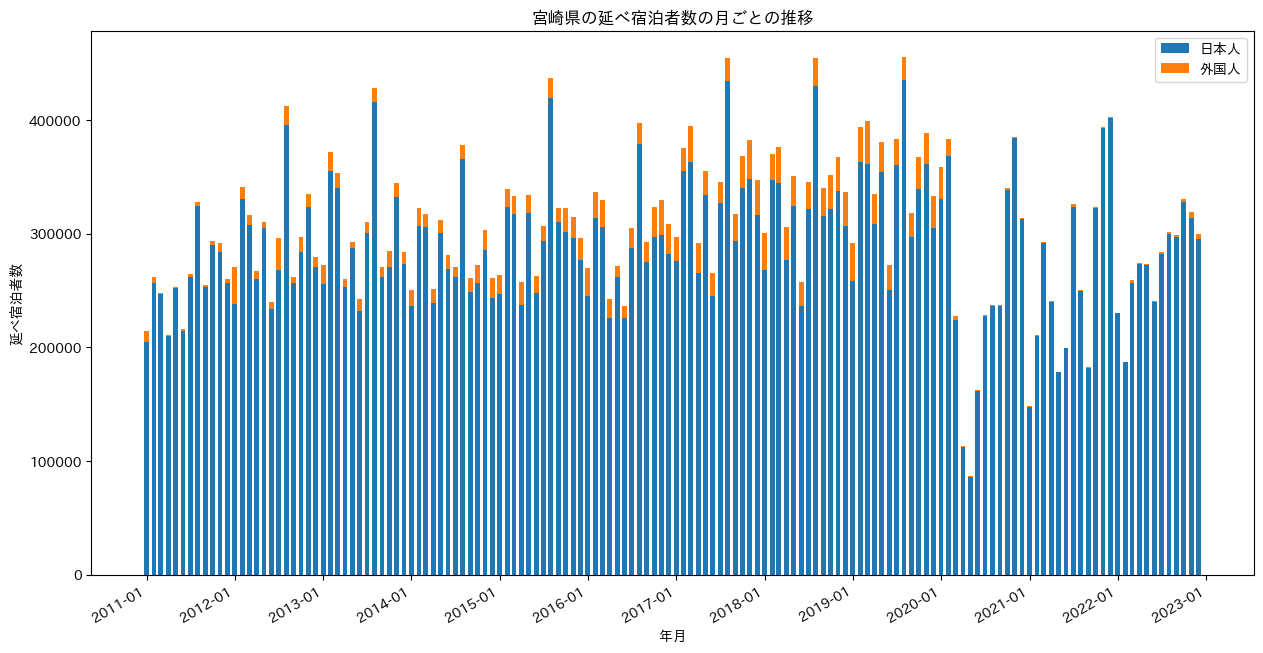

In [14]:
# データファイルを読み込みます
previous_concatenated_file = 'concatenated_filtered_data.csv'
data = pd.read_csv(previous_concatenated_file, encoding='shift_jis')

# グラフ化する都道府県名を指定
prefecture_name = '宮崎県'
# prefecture_name = '京都府'

# 指定した都道府県のデータだけをフィルタ
prefecture_data = data[data['都道府県名'] == prefecture_name]

# SettingWithCopyWarningという警告が出ないようにコピーを作成
prefecture_data_copy = prefecture_data.copy()

# プロットしやすいように'年月'列を追加
prefecture_data_copy['年月'] = pd.to_datetime(prefecture_data_copy['集計年'].astype(str) + '-' + prefecture_data_copy['集計月'].astype(str))

# データを'年月'でソート
sorted_data = prefecture_data_copy.sort_values(by='年月')

# 積み上げ棒グラフ
plt.figure(figsize=(15, 8))
plt.bar(sorted_data['年月'], sorted_data['延べ宿泊者数（日本人：人泊）'], label='日本人', width=20)
plt.bar(sorted_data['年月'], sorted_data['延べ宿泊者数（外国人：人泊）'], bottom=sorted_data['延べ宿泊者数（日本人：人泊）'], label='外国人', width=20)

# 横軸の設定（年月の表示）
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gcf().autofmt_xdate() # Rotation

# 軸ラベルとタイトルの設定、凡例の表示
plt.xlabel('年月')
plt.ylabel('延べ宿泊者数')
plt.title(f'{prefecture_name}の延べ宿泊者数の月ごとの推移')
plt.legend()

# グラフの表示
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
!pip install japanize_matplotlib
import japanize_matplotlib

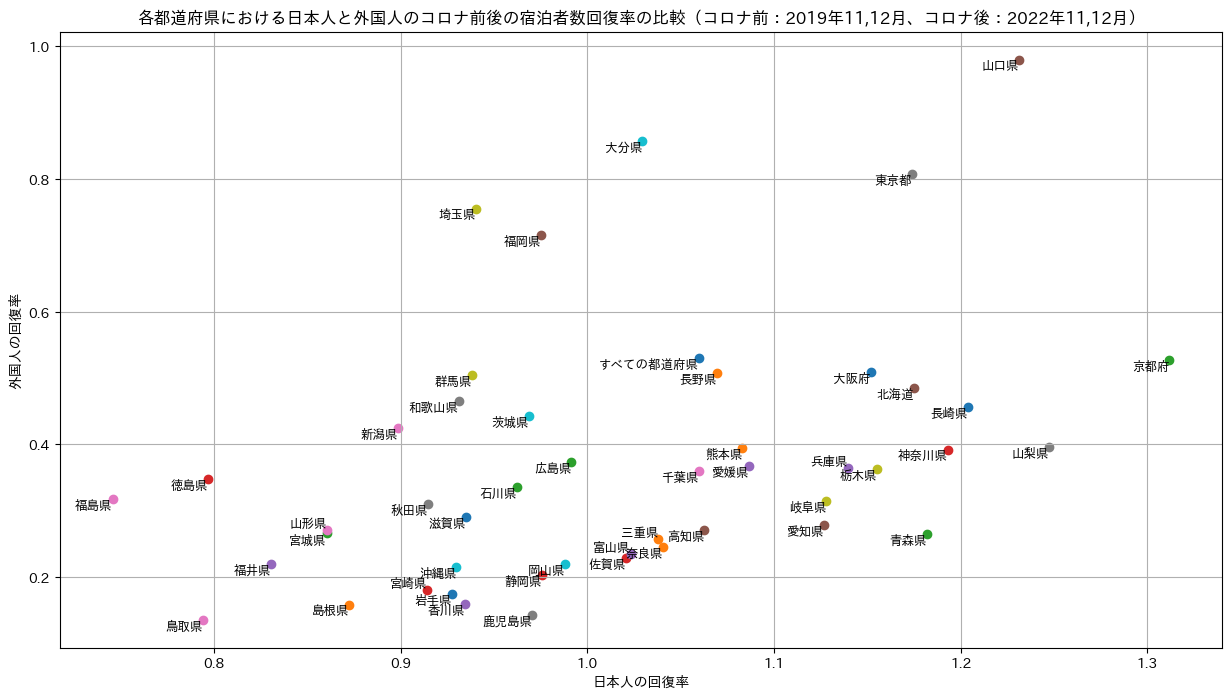

In [13]:
# CSV ファイルの読み込み
file_path = 'concatenated_filtered_data.csv'
data = pd.read_csv(file_path, encoding='shift_jis')

# 2022年11月と12月のデータを抽出：コロナ後
data_2022 = data[(data['集計年'] == 2022) & (data['集計月'].isin([11, 12]))]

# 2019年11月と12月のデータを抽出：コロナ前
data_2019 = data[(data['集計年'] == 2019) & (data['集計月'].isin([11, 12]))]

# 各都道府県ごとにデータをグループ化し、合計を計算
sum_2022 = data_2022.groupby('都道府県名').agg({'延べ宿泊者数（日本人：人泊）': 'sum', '延べ宿泊者数（外国人：人泊）': 'sum'})
sum_2019 = data_2019.groupby('都道府県名').agg({'延べ宿泊者数（日本人：人泊）': 'sum', '延べ宿泊者数（外国人：人泊）': 'sum'})

# コロナ前後の回復率を計算
recovery_data = sum_2022 / sum_2019
recovery_data.columns = ['日本人の回復率', '外国人の回復率']

# 散布図の作成、プロット点の近くに都道府県名を表示
plt.figure(figsize=(15, 8))
for prefecture in recovery_data.index:
    x = recovery_data.loc[prefecture, '日本人の回復率']
    y = recovery_data.loc[prefecture, '外国人の回復率']
    plt.scatter(x, y)
    # plt.text(x, y, prefecture, fontsize=9, ha='right')  # 都道府県名を表示

    # 文字が重なってしまう都道府県名の表示位置を調整
    if prefecture in ['山形県', '富山県', '三重県', '兵庫県', '宮崎県']:
        plt.text(x, y, prefecture, fontsize=9, ha='right', va='bottom')
    else:
        plt.text(x, y, prefecture, fontsize=9, ha='right', va='top')

plt.xlabel('日本人の回復率')
plt.ylabel('外国人の回復率')
plt.title('各都道府県における日本人と外国人のコロナ前後の宿泊者数回復率の比較（コロナ前：2019年11,12月、コロナ後：2022年11,12月）')
plt.grid(True)

# グラフを表示
plt.show()